In [1]:
from keras.applications import EfficientNetB0
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [2]:
train_data = np.load('CIFAKE_Train.npz')
test_data = np.load('CIFAKE_Test.npz')

In [3]:
x_train = train_data['images']
y_train = train_data['labels']

In [4]:
y_train.shape

(100000,)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [6]:
x_test = test_data['images']
y_test = test_data['labels']

In [7]:
label_names = train_data['label_names']

In [8]:
def PlotImages(ix_start,num_img,rows,cols,images,labels,label_names,color=True):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    for i in range(num_img):
        plt.subplot(rows,cols,i+1)
        plt.axis('off')
        if color:
            plt.imshow(images[ix_start+i])
        else:
            plt.imshow(np.squeeze(images[ix_start+i]),cmap='Greys')
        plt.title(label_names[labels[ix_start+i]])

In [9]:
efficient_net = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

16705208/16705208 [==============================] - 0s 0us/step


In [10]:
x = efficient_net.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
Ph = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=efficient_net.input, outputs=Ph)

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))

Epoch 1/10
2500/2500 [==============================] - 154s 44ms/step - loss: 0.2040 - accuracy: 0.9193 - val_loss: 0.1436 - val_accuracy: 0.9388
Epoch 2/10
2500/2500 [==============================] - 109s 43ms/step - loss: 0.1232 - accuracy: 0.9546 - val_loss: 0.1068 - val_accuracy: 0.9589
Epoch 3/10
2500/2500 [==============================] - 112s 45ms/step - loss: 0.0981 - accuracy: 0.9635 - val_loss: 0.0930 - val_accuracy: 0.9647
Epoch 4/10
2500/2500 [==============================] - 107s 43ms/step - loss: 0.0938 - accuracy: 0.9653 - val_loss: 0.0932 - val_accuracy: 0.9667
Epoch 5/10
2500/2500 [==============================] - 107s 43ms/step - loss: 0.0703 - accuracy: 0.9740 - val_loss: 0.1066 - val_accuracy: 0.9600
Epoch 6/10
2500/2500 [==============================] - 108s 43ms/step - loss: 0.0660 - accuracy: 0.9753 - val_loss: 0.0840 - val_accuracy: 0.9686
Epoch 7/10
2500/2500 [==============================] - 112s 45ms/step - loss: 0.0605 - accuracy: 0.9779 - val_loss: 0

In [13]:
datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [14]:
augmented_train_data = datagen.flow(x_train, y_train, batch_size=32, shuffle=False)

In [15]:
augmented_images, augmented_labels = next(augmented_train_data)

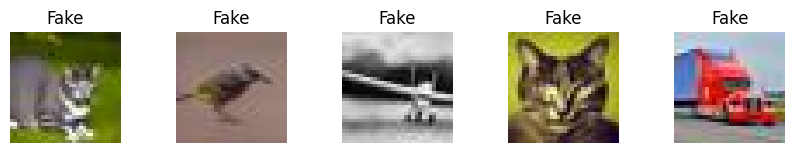

In [16]:
PlotImages(0,5,1,5,x_train,y_train,label_names)

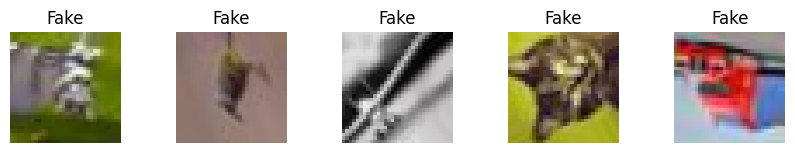

In [17]:
PlotImages(0,5,1,5,augmented_images,augmented_labels,label_names)

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

625/625 [==============================] - 6s 9ms/step - loss: 0.0776 - accuracy: 0.9716


In [19]:
model = tf.keras.Model(inputs=efficient_net.input, outputs=Ph)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(augmented_train_data, epochs=10, batch_size=32, validation_data=(x_val,y_val))

Epoch 1/10
2500/2500 [==============================] - 203s 69ms/step - loss: 0.4935 - accuracy: 0.7753 - val_loss: 43.5160 - val_accuracy: 0.4958
Epoch 2/10
2500/2500 [==============================] - 171s 68ms/step - loss: 0.2961 - accuracy: 0.8750 - val_loss: 22.3884 - val_accuracy: 0.5041
Epoch 3/10
2500/2500 [==============================] - 173s 69ms/step - loss: 0.2567 - accuracy: 0.8936 - val_loss: 1751.1569 - val_accuracy: 0.4958
Epoch 4/10
2500/2500 [==============================] - 178s 71ms/step - loss: 0.2288 - accuracy: 0.9074 - val_loss: 323.8745 - val_accuracy: 0.4958
Epoch 5/10
2500/2500 [==============================] - 174s 70ms/step - loss: 0.2135 - accuracy: 0.9136 - val_loss: 1374.6980 - val_accuracy: 0.4958
Epoch 6/10
2500/2500 [==============================] - 173s 69ms/step - loss: 0.2008 - accuracy: 0.9201 - val_loss: 7944.1895 - val_accuracy: 0.4958
Epoch 7/10
2500/2500 [==============================] - 179s 72ms/step - loss: 0.2000 - accuracy: 0.9207 

In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

625/625 [==============================] - 6s 10ms/step - loss: 55934.2852 - accuracy: 0.5000
